In [124]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import os

# download data

In [125]:
tickets = ["NVDA"]

In [126]:
end_date = datetime.today()

In [127]:
start_date = end_date - timedelta(days=365*5)

In [128]:
df = pd.DataFrame()

In [129]:
df = yf.download(tickets, period = '5y')

[*********************100%***********************]  1 of 1 completed


In [130]:
df

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2020-03-09,6.114039,6.461790,5.933189,5.976035,614160000
2020-03-10,6.503639,6.503639,6.127739,6.390545,580648000
2020-03-11,6.139696,6.392040,6.042545,6.363642,499964000
2020-03-12,5.388396,5.881873,5.375691,5.616327,816540000
2020-03-13,5.999451,6.003934,5.470600,5.741876,634836000
...,...,...,...,...,...
2025-03-03,114.059998,123.699997,112.279999,123.510002,411381400
2025-03-04,115.989998,119.309998,110.110001,110.650002,398163300


In [131]:
import matplotlib.pyplot as plt

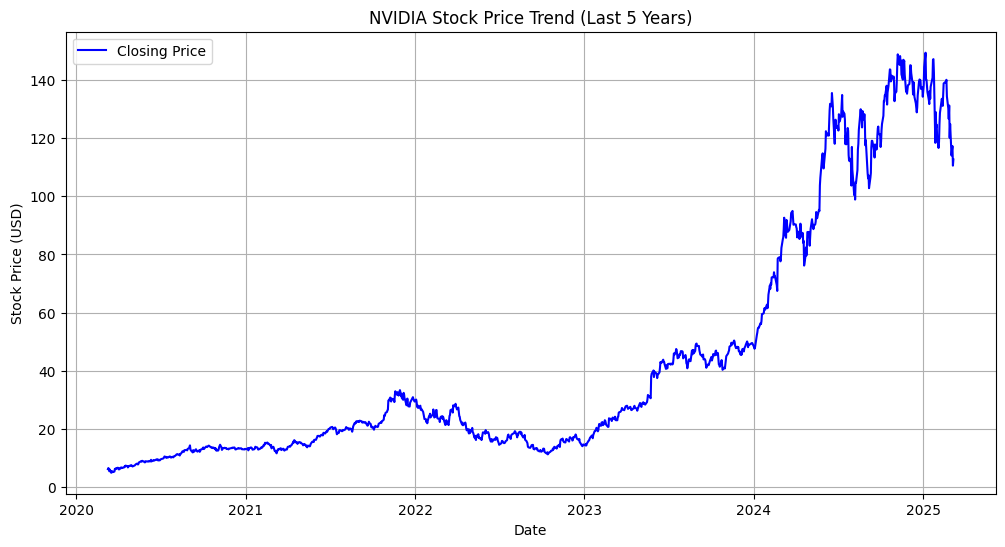

<Figure size 640x480 with 0 Axes>

In [132]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.title("NVIDIA Stock Price Trend (Last 5 Years)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid()
plt.show()
plt.savefig("nvda_stock_price(Last 5 Years).png")

In [133]:
# Calculate moving average -- SMA and EMA
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['EMA_100'] = df['Close'].ewm(span=100, adjust=False).mean()

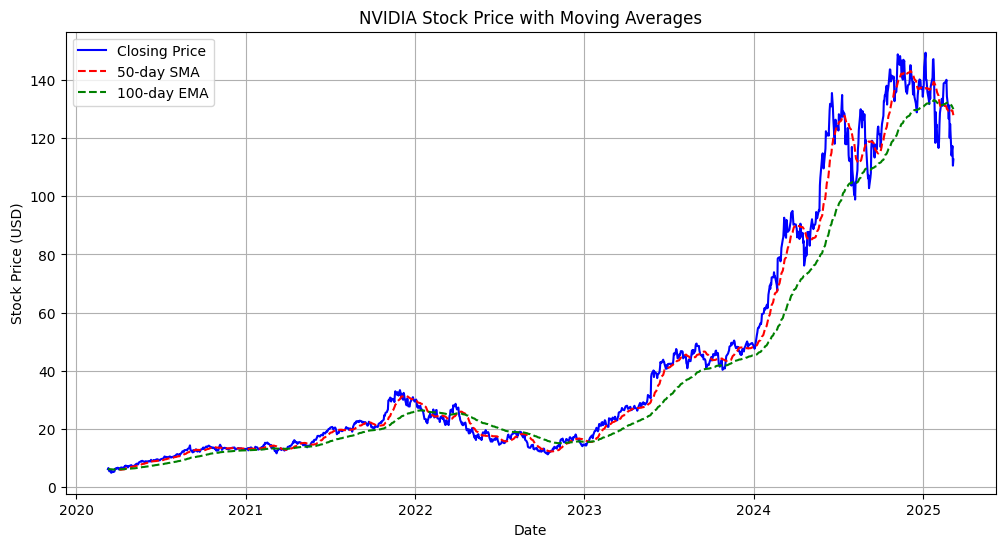

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label="Closing Price", color="blue")
plt.plot(df.index, df['SMA_20'], label="50-day SMA", color="red", linestyle="dashed")
plt.plot(df.index, df['EMA_100'], label="100-day EMA", color="green", linestyle="dashed")
plt.title("NVIDIA Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid()
plt.savefig("nvda_stock_price with Moving Averages.png")

# Stock returns -- Daily & Cumulative

In [135]:
df['Daily Return'] = df['Close'].pct_change()
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

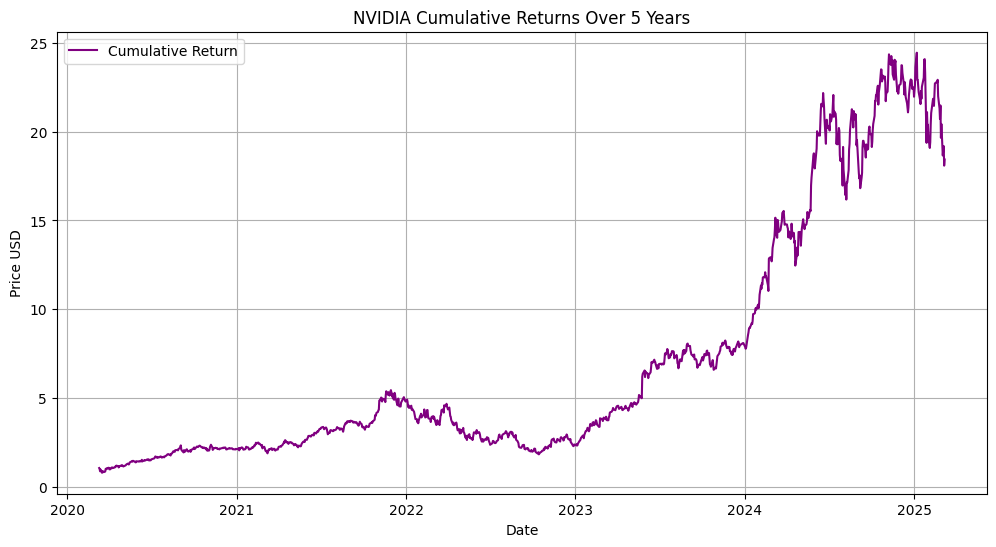

<Figure size 640x480 with 0 Axes>

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Cumulative Return"], label="Cumulative Return",
         color="purple")
plt.title("NVIDIA Cumulative Returns Over 5 Years")
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.legend()
plt.grid()
plt.show()
plt.savefig("nvda_Cumulative Returns Over 5 Years.png")

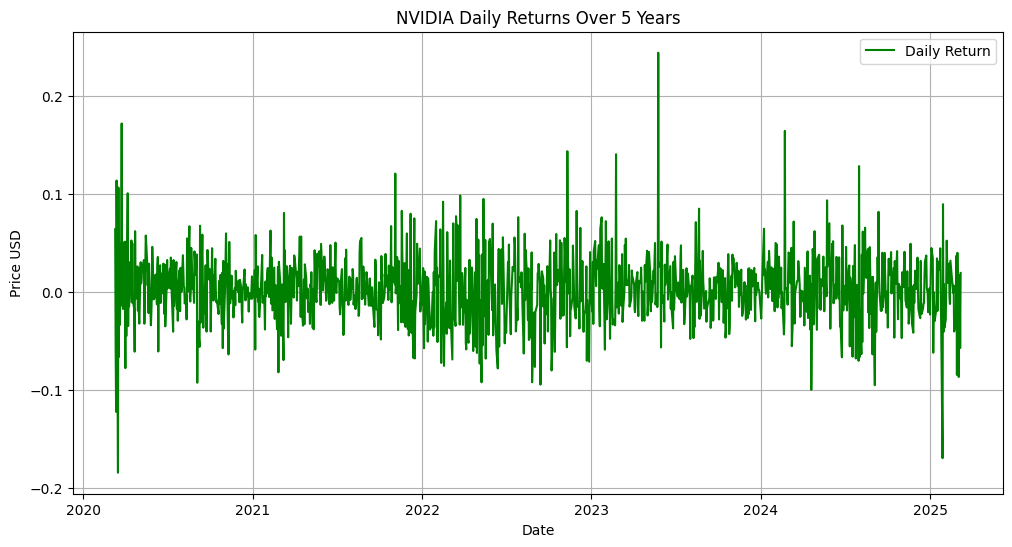

<Figure size 640x480 with 0 Axes>

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Daily Return"], label="Daily Return",
         color="green")
plt.title("NVIDIA Daily Returns Over 5 Years")
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.legend()
plt.grid()
plt.show()
plt.savefig("nvda_Daily Returns Over 5 Years.png")

# Volatility Analysis

In [138]:
df['Volatility'] = df['Close'].rolling(window=30).std()

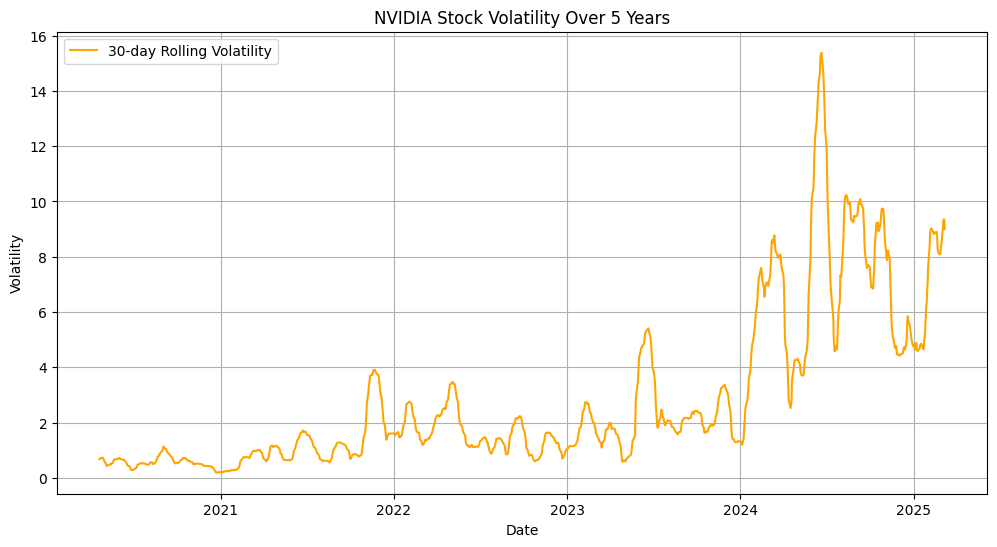

<Figure size 640x480 with 0 Axes>

In [139]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Volatility"], label="30-day Rolling Volatility", color="orange")
plt.title("NVIDIA Stock Volatility Over 5 Years")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid()
plt.show()
plt.savefig("nvda_Stock Volatility Over 5 Years.png")

# Trends with Bollinger Bands

In [140]:
# Bollinger Bands (20-day SMA with 2 std deviation)
df['SMA_std'] = df['Close'].rolling(window=20).std()
df['Upper_Band'] = df['SMA_20'] + (df['SMA_std'] * 2)
df['Lower_Band'] = df['SMA_20'] - (df['SMA_std'] * 2)


In [141]:
df['Bandwidth'] = (df['Upper_Band'] - df['Lower_Band']) / df['SMA_20']

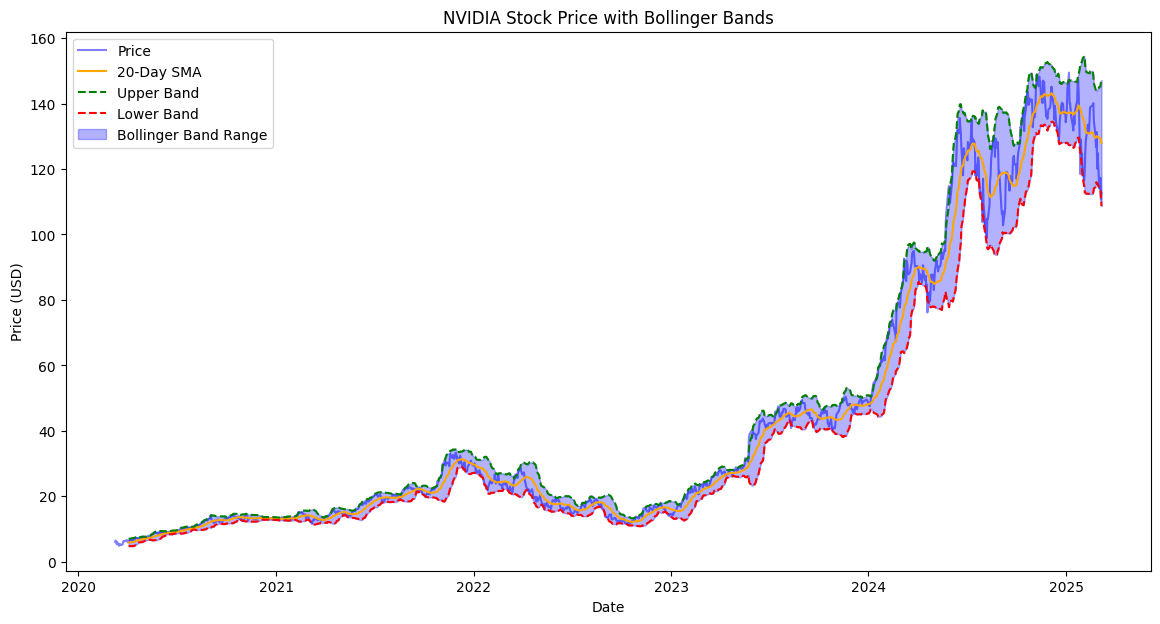

<Figure size 640x480 with 0 Axes>

In [142]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Price', color='blue', alpha=0.5)
plt.plot(df['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(df['Upper_Band'], label='Upper Band', color='green', linestyle='--')
plt.plot(df['Lower_Band'], label='Lower Band', color='red', linestyle='--')
plt.fill_between(df.index, df['Upper_Band'], df['Lower_Band'], color='blue', alpha=0.3, label='Bollinger Band Range')

plt.title(f'NVIDIA Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
plt.savefig("nvda_Stock Price with Bollinger Bands.png")